In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

%matplotlib inline

In [38]:
df = pd.read_csv('train.csv')
df.head()
final_test = pd.read_csv('test.csv')
final_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [55]:
df.rename(columns= {col: col.lower().replace(' ','_') for col in df.columns}, inplace=True)
final_test.rename(columns= {col: col.lower().replace(' ','_') for col in final_test.columns}, inplace=True)

In [4]:
df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 82 columns):
id                 2051 non-null int64
pid                2051 non-null int64
ms_subclass        2051 non-null int64
ms_zoning          2051 non-null object
lot_frontage       1721 non-null float64
lot_area           2051 non-null int64
street             2051 non-null object
alley              140 non-null object
lot_shape          2051 non-null object
land_contour       2051 non-null object
utilities          2051 non-null object
lot_config         2051 non-null object
land_slope         2051 non-null object
neighborhood       2051 non-null object
condition_1        2051 non-null object
condition_2        2051 non-null object
bldg_type          2051 non-null object
house_style        2051 non-null object
overall_qual       2051 non-null int64
overall_cond       2051 non-null int64
year_built         2051 non-null int64
year_remod/add     2051 non-null int64
roof_style         20

In [6]:
# for test submit use lot_area

In [7]:
y = df['saleprice']
X = df[['lot_area']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=101)
# dont need to do since we have the whole
# check how the model is doing

In [9]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [10]:
lr = LinearRegression()
lr.fit(X_train_sc ,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
lr.score(X_train_sc, y_train)

0.068199829749972518

In [12]:
lr.score(X_test_sc, y_test)

0.10031844995404249

In [13]:
lr.predict(X_test_sc)

array([ 179148.53970767,  195233.63602817,  171695.36481723, ...,
        171695.36481723,  161613.97993894,  177092.78318284])

Text(0,0.5,'Predicted')

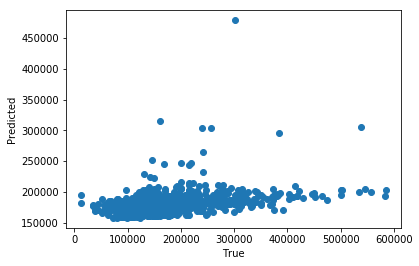

In [14]:
plt.scatter(y_test, lr.predict(X_test_sc))
plt.xlabel('True')
plt.ylabel('Predicted')

Text(0,0.5,'Residuals')

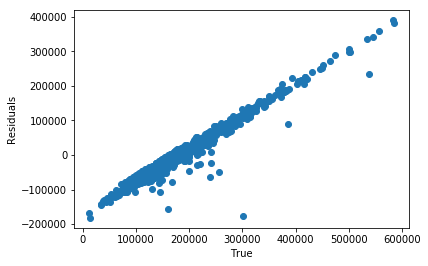

In [15]:
residuals = y_test - lr.predict(X_test_sc)
plt.scatter(y_test, residuals)
plt.xlabel('True')
plt.ylabel('Residuals')

## Test Data for submit

In [56]:
final_test.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [ ]:
final_test['lot_area']

In [58]:
# y = df['saleprice'] #not y since we dont have
X_final_test = final_test[['lot_area']]

X_final_test_sc = ss.transform(X_final_test)
# use the final_test X

lr.predict(X_final_test_sc)
# put in DF
# then export to csv and submit

array([ 179878.91136739,  181345.29462241,  202331.49497605,
        178124.89139696,  180888.45983912,  159428.5048954 ,
        178113.61152576,  180284.98673032,  164010.95256735,
        182650.93971294,  174332.03470848,  174402.53390343,
        185992.60155372,  176590.82891478,  187196.72780352,
        179647.67400794,  184554.41797668,  181088.67755278,
        184554.41797668,  203930.41671758,  177352.22022027,
        178065.6720732 ,  176692.34775551,  214595.53493009,
        181184.55645792,  174346.13454747,  189385.02281486,
        179478.47594005,  178914.48238043,  163968.65305038,
        174797.32939517,  171695.36481723,  187092.38899499,
        182298.44373818,  185586.52619079,  191333.62056337,
        169664.98800259,  179478.47594005,  179173.91941786,
        174743.75000701,  165240.45852733,  185721.8846451 ,
        174932.68784948,  195154.67692982,  165530.91521054,
        158421.77639147,  185823.40348583,  176094.51458231,
        170646.33679633,

In [59]:
preds = lr.predict(X_final_test_sc)

In [60]:
export = pd.DataFrame(lr.predict(X_final_test_sc))

In [62]:
submission=final_test[['id']]

In [63]:
len(preds)

879

In [64]:
final_test.shape

(879, 80)

In [65]:
submission['SalePrice'] = preds

C:\Users\Mark\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
submission.head()

,id,SalePrice
0,2658,179878.911367
1,2718,181345.294622
2,2414,202331.494976
3,1989,178124.891397
4,625,180888.459839


In [67]:
submission.to_csv('export_submit.csv', index=False)